Loading Datasets and Visualizing

In [1]:
#Imoort data
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\vini3\Downloads\marketing_dataset_india.csv")

In [2]:
df.head()

,Company Size,Revenue (INR),Investment (INR),Marketing Strategy,Growth Rate (%),Customer Reach,Marketing Budget (INR),Marketing Schemes
0,Small,209900595,58673237,Digital,11.501674,2489,5000,Social Media Ads
1,Small,335190492,75293686,Digital,8.646972,1161,7000,Local Newspaper Ads
2,Small,260975502,11983509,Digital,10.606772,811,12000,Flyers Distribution
3,Small,469535466,28298917,Traditional,9.810619,3420,8000,Community Events
4,Small,137521863,53563237,Digital,13.849984,1582,10000,Radio Ads


In [3]:
print(df.dtypes)

Company Size               object
Revenue (INR)               int64
Investment (INR)            int64
Marketing Strategy         object
Growth Rate (%)           float64
Customer Reach              int64
Marketing Budget (INR)      int64
Marketing Schemes          object
dtype: object


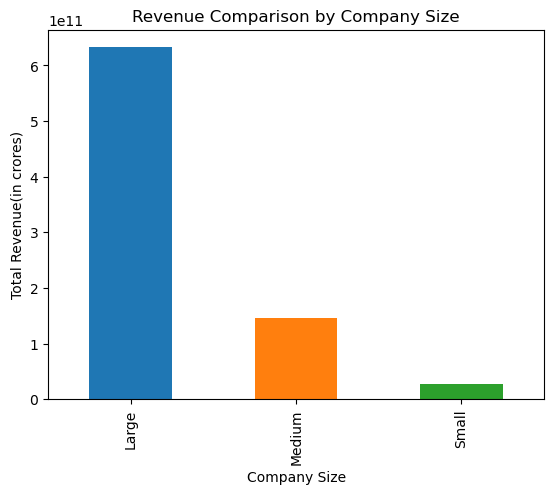

In [4]:
#COMPARE INDUSTRIES BY REVENUE
df['Company Size'].unique()
df['revenue_crores']=df['Revenue (INR)']/1e7
revenue_by_size=df.groupby('Company Size')['Revenue (INR)'].sum()
revenue_by_size.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Revenue Comparison by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Total Revenue(in crores)')
plt.show()

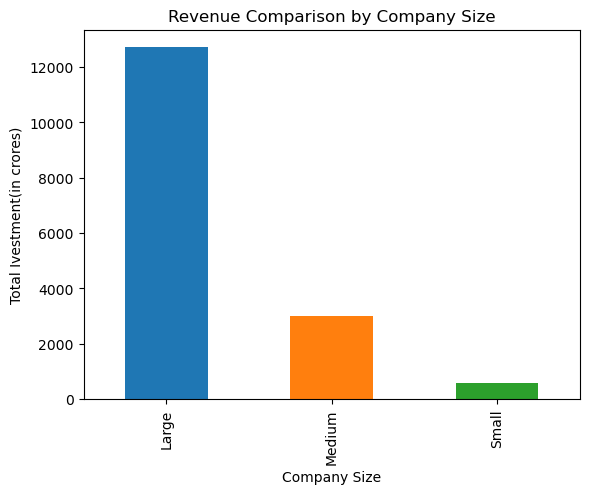

In [5]:
#COMPARE INDUSTRIES BY INVESTMENT
df['Company Size'].unique()
df['investment_crores'] = df['Investment (INR)'] / 1e7
revenue_by_size=df.groupby('Company Size')['investment_crores'].sum()
revenue_by_size.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Revenue Comparison by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Total Ivestment(in crores)')
plt.show()

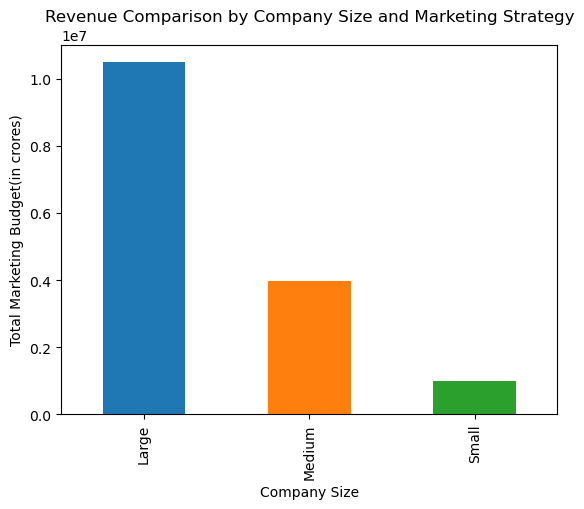

In [6]:
#COMPARING INDUSTRIES BY MARKETING BUDGET AND MARKETING STRATEGY
df['Company Size'].unique()
df['Marketing Budget (INR)'] = pd.to_numeric(df['Marketing Budget (INR)'], errors='coerce')
revenue_by_size=df.groupby('Company Size')['Marketing Budget (INR)'].sum()
revenue_by_size.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Revenue Comparison by Company Size and Marketing Strategy')
plt.xlabel('Company Size')
plt.ylabel('Total Marketing Budget(in crores)')
plt.show()

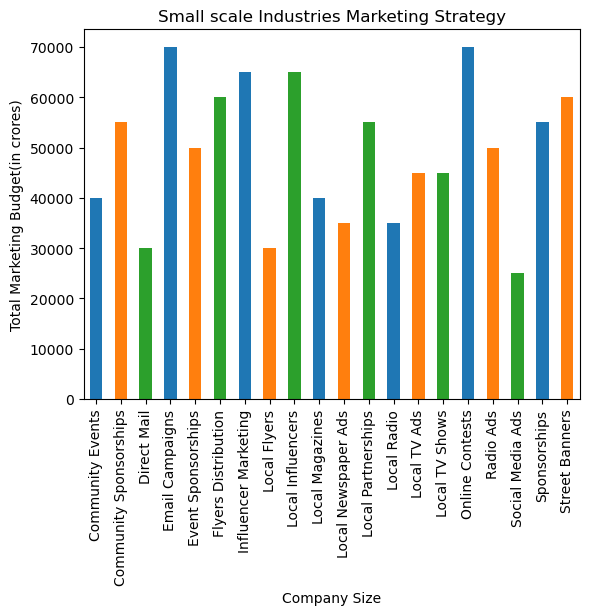

In [7]:
#COMPARING INDUSTRIES BY MARKETING BUDGET AND MARKETING STRATEGY
df['Company Size'].unique()
small_scale=df[df['Company Size']=='Small']
df['Marketing Budget (INR)'] = pd.to_numeric(df['Marketing Budget (INR)'], errors='coerce')
revenue_by_size=small_scale.groupby(['Marketing Schemes'])['Marketing Budget (INR)'].sum()
revenue_by_size.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Small scale Industries Marketing Strategy')
plt.xlabel('Company Size')
plt.ylabel('Total Marketing Budget(in crores)')
plt.show()

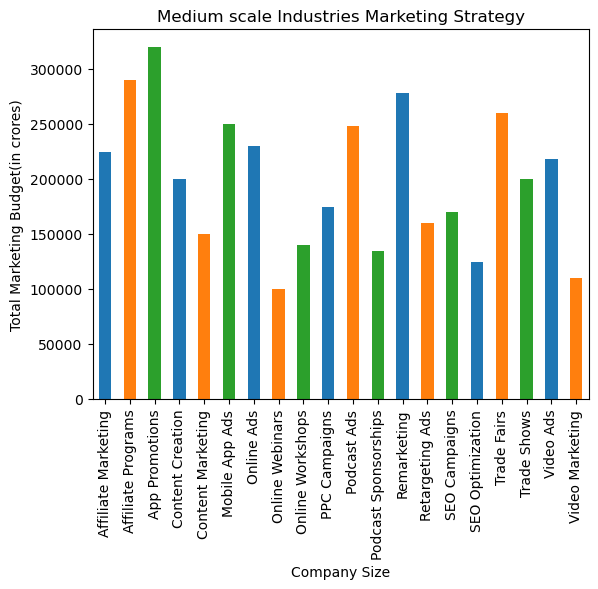

In [8]:
#COMPARING INDUSTRIES BY MARKETING BUDGET AND MARKETING STRATEGY
df['Company Size'].unique()
medium_scale=df[df['Company Size']=='Medium']
df['Marketing Budget (INR)']=pd.to_numeric(df['Marketing Budget (INR)'],errors='coerce')
revenue_by_size=medium_scale.groupby(['Marketing Schemes'])['Marketing Budget (INR)'].sum()
revenue_by_size.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Medium scale Industries Marketing Strategy')
plt.xlabel('Company Size')
plt.ylabel('Total Marketing Budget(in crores)')
plt.show()

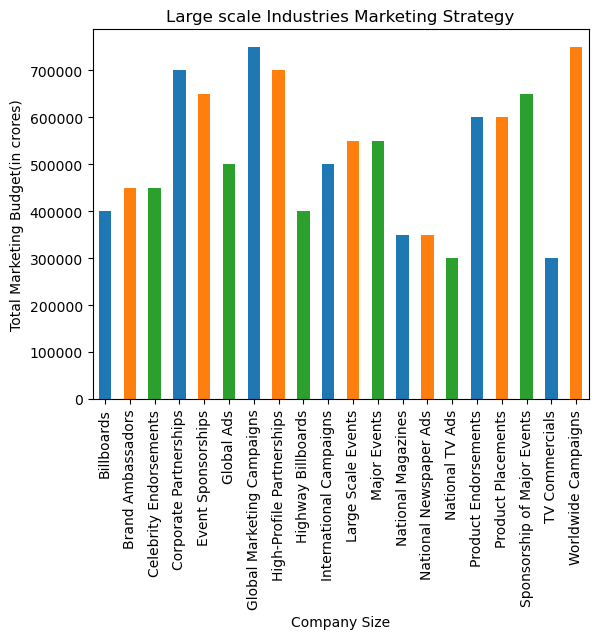

In [9]:
#COMPARING INDUSTRIES BY MARKETING BUDGET AND MARKETING STRATEGY
df['Company Size'].unique()
large_scale=df[df['Company Size']=='Large']
df['Marketing Budget (INR)']=pd.to_numeric(df['Marketing Budget (INR)'],errors='coerce')
revenue_by_size=large_scale.groupby(['Marketing Schemes'])['Marketing Budget (INR)'].sum()
revenue_by_size.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Large scale Industries Marketing Strategy')
plt.xlabel('Company Size')
plt.ylabel('Total Marketing Budget(in crores)')
plt.show()

Machine Supervised Learning Model 

In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Input
from tensorflow.keras.utils import to_categorical

In [11]:
df=pd.read_csv(r"C:\Users\vini3\Downloads\marketing_dataset_india.csv")
print(df.dtypes)

Company Size               object
Revenue (INR)               int64
Investment (INR)            int64
Marketing Strategy         object
Growth Rate (%)           float64
Customer Reach              int64
Marketing Budget (INR)      int64
Marketing Schemes          object
dtype: object


In [12]:
df.describe()

,Revenue (INR),Investment (INR),Growth Rate (%),Customer Reach,Marketing Budget (INR)
count,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000
mean,2.680543e+09,5.432254e+08,6.538018,101994.390000,51546.666667
std,2.966581e+09,5.875984e+08,3.609668,142469.223256,45548.325862
min,1.334477e+07,1.099616e+07,1.004927,501.000000,5000.000000
25%,3.818005e+08,7.714091e+07,3.598054,3710.000000,12000.000000
50%,1.464223e+09,3.056754e+08,5.564837,30518.500000,32000.000000
75%,3.915306e+09,8.662097e+08,9.157990,180560.250000,90000.000000
max,9.991155e+09,1.996094e+09,14.963358,497907.000000,150000.000000


In [13]:
label_encoder_company_size=LabelEncoder()
df['Company_Size_Encoded']=label_encoder_company_size.fit_transform(df['Company Size'])

In [14]:
label_encoder_market_scheme=LabelEncoder()
df['Market_Scheme_Encoded']=label_encoder_market_scheme.fit_transform(df['Marketing Schemes'])

In [15]:
scaler=StandardScaler()
df['marketing_budget_scaled']=scaler.fit_transform(df[['Marketing Budget (INR)']])

In [16]:
X=df[['marketing_budget_scaled']]
y=to_categorical(df['Market_Scheme_Encoded'])

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model=Sequential()
model.add(Embedding(input_dim=len(label_encoder_company_size.classes_),output_dim=10,input_length=1))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

C:\Users\vini3\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train['marketing_budget_scaled'],y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0000e+00 - loss: 4.0778 - val_accuracy: 0.0000e+00 - val_loss: 4.0765
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0085 - loss: 4.0771 - val_accuracy: 0.0000e+00 - val_loss: 4.0772
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0181 - loss: 4.0762 - val_accuracy: 0.0000e+00 - val_loss: 4.0780
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 4.0746 - val_accuracy: 0.0000e+00 - val_loss: 4.0785
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0304 - loss: 4.0738 - val_accuracy: 0.0000e+00 - val_loss: 4.0787
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0341 - loss: 4.0717 - val_accuracy: 0.0000e+00 - val_loss: 4.0788
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0240 - loss: 4.0710 - val_accuracy: 0.0000e+00 - val_loss: 4.0787
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0240 - loss: 4.0708 - val

In [21]:
loss,accuracy=model.evaluate(X_test['marketing_budget_scaled'],y_test)
print(f'Loss:{loss},Accuracy:{accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 3.8463 
Loss:3.8339602947235107,Accuracy:0.0
